In [0]:
# Deep learning modules
from tensorflow.keras import layers
import tensorflow as tf

# data-science packages
from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

# system
import platform
import os

In [0]:
# Print the version of tensorflow
print("Python version:", platform.python_version())
print("Tensorflow version:", tf.__version__)
print("Keras version:", tf.keras.__version__)

# For displaying the plots within the notebook
%matplotlib inline

# Disable all tensorflow warnings and errors
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

Python version: 3.6.8
Tensorflow version: 1.14.0
Keras version: 2.2.4-tf


# Basic Tensorflow operations
To understand variables, placeholders, session

In [0]:
# Hello world in tensorflow
hello = tf.constant("Hello")
world = tf.constant(" World")
with tf.Session() as sess:
    result = sess.run(hello + world)
print(result)

b'Hello World'


In [0]:
# Matrix addition and multiplication

# Create simple matrices
mat_a = [[1, 2, 3],
         [4, 5, 6],
         [7, 8, 9]]

mat_b = [[10.2, 11.3, 12.0],
         [11.0, 22.0, 33.0],
         [56.0, 123.0, 16.0]]

# PlaceHolders
mat1 = tf.placeholder(tf.float32)
mat2 = tf.placeholder(tf.float32)

mat_add = mat1 + mat2
mat_mul = tf.matmul(mat1, mat2)

with tf.Session() as sess:
    add_result = sess.run(mat_add, feed_dict={mat1: mat_a, mat2: mat_b})
    mul_result = sess.run(mat_mul, feed_dict={mat1: mat_a, mat2: mat_b})

print(add_result, mul_result, sep="\n\n")

[[ 11.2  13.3  15. ]
 [ 15.   27.   39. ]
 [ 63.  131.   25. ]]

[[ 200.2  424.3  126. ]
 [ 431.8  893.2  309. ]
 [ 663.4 1362.1  492. ]]


# Simple Classification problem using Keras
To understand the keras API for building a simple neural network

(1000, 2) (1000,)


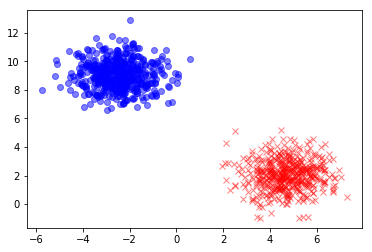

In [0]:
# create data
# make_circles(n_samples=1000, noise=0.1, factor=0.2, random_state=100)
X, y = make_blobs(n_samples=1000, centers=2, random_state=42)
print(X.shape, y.shape)

# plot the data
plt.plot(X[y==0, 0], X[y==0, 1], 'ob', alpha=0.5)
plt.plot(X[y==1, 0], X[y==1, 1], 'xr', alpha=0.5)
plt.show()

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3,
                                                    random_state=42)

In [0]:
# Creating a model
model = tf.keras.Sequential()

# Adding one dense layer
model.add(layers.Dense(1, input_shape=(2,), activation='sigmoid'))

# Compile and fit the model
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.05),
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.fit(X_train, y_train, epochs=100, verbose=0)

# Evaluate the model with the test data
eval_result = model.evaluate(X_test, y_test)
print("Loss and Accuracy: ", eval_result)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
300/300 [==============================] - 0s 102us/sample - loss: 7.9877e-05 - acc: 1.0000
Loss and Accuracy:  [7.987676105888871e-05, 1.0]


# Convolutional Neural Networks (CNN) using Keras
Simple digit classification using the MNIST dataset

Reference: [Medium blog post](https://towardsdatascience.com/image-classification-in-10-minutes-with-mnist-dataset-54c35b77a38d)

11493376/11490434 [==============================] - 0s 0us/step


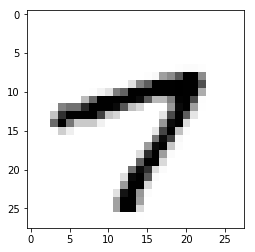

In [0]:
# Get the MNIST data (Modified National Institute of Standards and Technology)
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
plt.imshow(x_train[101], cmap='Greys')
plt.show()

In [0]:
print("Before:", x_train.shape, x_test.shape, y_train.shape, y_test.shape)

# Reshape
x_train = x_train.astype('float32').reshape(*x_train.shape, 1)
x_test = x_test.astype('float32').reshape(*x_test.shape, 1)

# Normalizing
x_train /= 255
x_test /= 255

print("After:", x_train.shape, x_test.shape)

Before: (60000, 28, 28) (10000, 28, 28) (60000,) (10000,)
After: (60000, 28, 28, 1) (10000, 28, 28, 1)


In [0]:
# Create a model
model = tf.keras.Sequential()

# 2D Convolution
model.add(layers.Conv2D(filters=28,
                        kernel_size=(3, 3),
                        input_shape=(28, 28, 1)))

# Maxpooling
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

# Flattening for fully connected layers
model.add(layers.Flatten())

# Densely connected layer (ReLu: Rectified Linear Unit)
model.add(layers.Dense(units=128, activation='relu'))

# To prevent over-fitting
model.add(layers.Dropout(rate=0.2))

# Densely connected layer with softmax
# 10 here represents the number of classes
model.add(layers.Dense(units=10, activation='softmax'))

# Compile the model with Adam optimizer
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Fitting the model
model.fit(x=x_train, y=y_train, batch_size=128, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 26s 430us/sample - loss: 0.2794 - acc: 0.9179
Epoch 2/10
60000/60000 [==============================] - 27s 457us/sample - loss: 0.1164 - acc: 0.9647
Epoch 3/10
60000/60000 [==============================] - 27s 454us/sample - loss: 0.0791 - acc: 0.9760
Epoch 4/10
60000/60000 [==============================] - 27s 451us/sample - loss: 0.0604 - acc: 0.9816
Epoch 5/10
60000/60000 [==============================] - 26s 439us/sample - loss: 0.0467 - acc: 0.9853
Epoch 6/10
60000/60000 [==============================] - 26s 439us/sample - loss: 0.0367 - acc: 0.9887
Epoch 7/10
60000/60000 [==============================] - 27s 445us/sample - loss: 0.0314 - acc: 0.9899
Epoch 8/10
60000/60000 [==============================] - 26s 441us/sample - loss: 0.0248 - acc: 0.9922
Epoch 9/10
60000/60000 [==============================] - 26s 438us/sample - loss: 0.0208 - acc: 0.9930
Epoch 10/10
60000/60000 [==============================] - 26s 4

10000/10000 [==============================] - 2s 202us/sample - loss: 0.0437 - acc: 0.9855
3 3


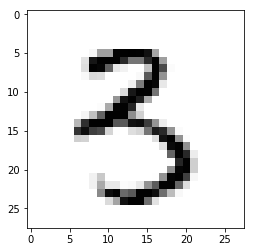

In [0]:
# Evaluate the model
model.evaluate(x_test, y_test)

# Check prediction
plt.imshow(x_test[5000].reshape(28, 28), cmap='Greys')
pred = model.predict(x_test[5000].reshape(1, 28, 28, 1))
print(pred.argmax(), y_test[5000])

In [0]:
model.save("cnn.h5")